# Will Students PASS OR FAIL?
We selected the “Student Performance” dataset from the UCI Machine Learning Repository, which contains data from 649 students in Portuguese secondary schools. It includes 30 features covering various aspects such as student background (e.g., age, gender, parental education, home address), school-related information (e.g., school name, internet access, extra academic support), and behavioral traits (e.g., free time, health, and alcohol consumption). The dataset also includes three grade-related variables: G1 and G2 (grades from the first two periods), and G3, the final grade, which ranges from 0 to 20. For our project, we focused specifically on the math subset of the data and framed our task as a binary classification problem—predicting whether a student will pass or fail based on their final grade. A passing grade is defined as a G3 score of 10 or higher. This dataset allows us to explore how academic, personal, and social factors influence students' likelihood of success in math.

Note: For G1 and G2 Variables we experimented with both keeping them and leaving them in the dataset

# Dataset Features List

school - student's school ('GP' - Gabriel Pereira)

sex - student's sex ('F' - female or 'M' - male)

age - student's age (15 to 22)

address - student's home address type ('U' - urban or 'R' - rural)

famsize - family size ('LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status ('T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

URL= https://archive.ics.uci.edu/dataset/320/student+performance

In [ ]:
!pip install --quiet dmba

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# predictive mlr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dmba import classificationSummary, plotDecisionTree

from sklearn import metrics
from sklearn.metrics import RocCurveDisplay


In [ ]:
file_path = '/content/drive/MyDrive/StudentPerformance/student-mat.csv'

df = pd.read_csv(file_path, sep = ";")

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Data Inspection

In [ ]:
df.shape

(395, 33)

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(len(df[(df[column] < lower_bound) | (df[column] > upper_bound)]))
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_columns = ['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'G1','absences']

for column in numerical_columns:
    df = remove_outliers_iqr(df, column)

1
8
26
79
16
10
0
0
0
15


In [ ]:
df.loc[df['G1'] >= 10, 'Final_Grade'] = 1
df.loc[df['G1'] < 10, 'Final_Grade'] = 0

<Axes: xlabel='Final_Grade', ylabel='age'>

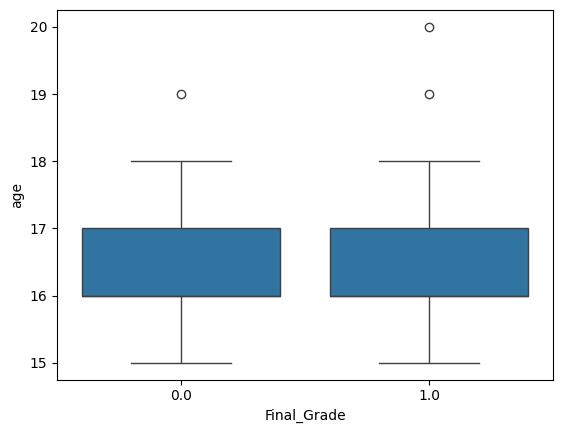

In [ ]:
sns.boxplot(x = 'Final_Grade', y = 'age', data = df)

<Axes: xlabel='Final_Grade', ylabel='count'>

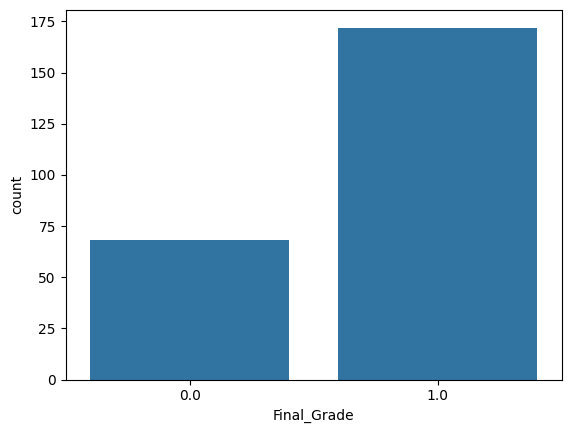

In [ ]:
sns.countplot(x = 'Final_Grade', data = df)

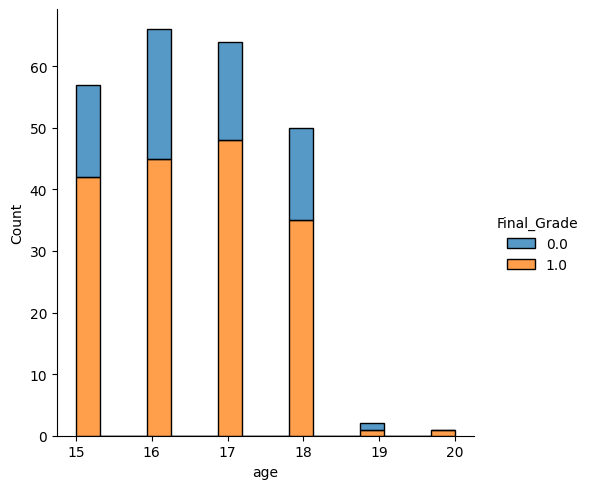

In [ ]:
sns.displot(data = df, x = 'age', hue = 'Final_Grade', multiple = 'stack')

<Axes: xlabel='age', ylabel='absences'>

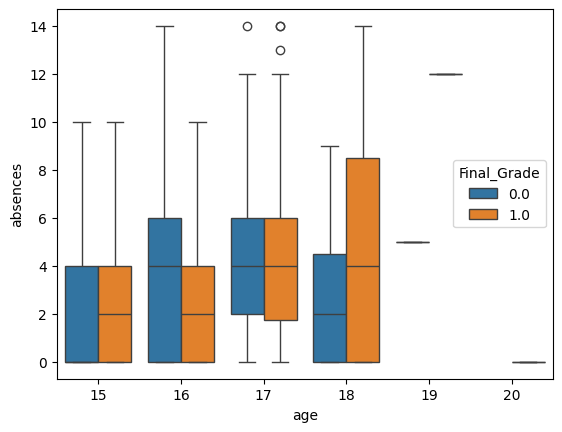

In [ ]:
sns.boxplot(data = df, x = 'age', y = 'absences', hue = 'Final_Grade')

In [ ]:
df_new = df[['sex', 'age', 'Pstatus', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'famrel', 'freetime', 'goout', 'health', 'absences','Final_Grade']]

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 394
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          240 non-null    object 
 1   age          240 non-null    int64  
 2   Pstatus      240 non-null    object 
 3   traveltime   240 non-null    int64  
 4   studytime    240 non-null    int64  
 5   failures     240 non-null    int64  
 6   schoolsup    240 non-null    object 
 7   famsup       240 non-null    object 
 8   paid         240 non-null    object 
 9   activities   240 non-null    object 
 10  higher       240 non-null    object 
 11  internet     240 non-null    object 
 12  famrel       240 non-null    int64  
 13  freetime     240 non-null    int64  
 14  goout        240 non-null    int64  
 15  health       240 non-null    int64  
 16  absences     240 non-null    int64  
 17  Final_Grade  240 non-null    float64
dtypes: float64(1), int64(9), object(8)
memory usage: 35.6+ 

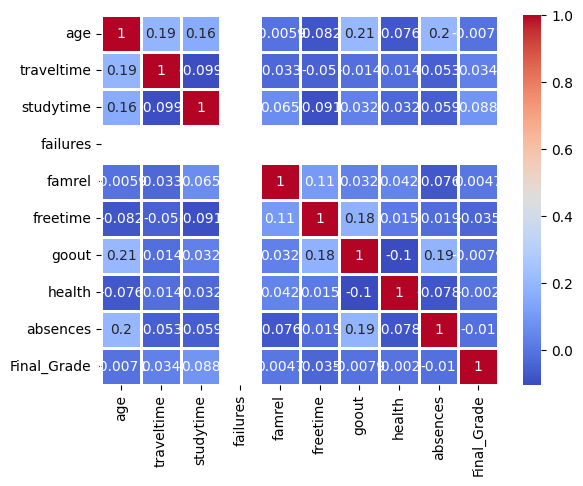

<Figure size 1000x1000 with 0 Axes>

In [ ]:
corr_df = df_new[['age','traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences','Final_Grade']].corr()
sns.heatmap(corr_df, cmap = 'coolwarm', annot = True, linewidths = 1)
plt.figure(figsize = (10, 10))
plt.show()

In [ ]:
df_new.columns

Index(['sex', 'age', 'Pstatus', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'Final_Grade'],
      dtype='object')

In [ ]:
df_dummy = pd.get_dummies(df_new, dtype = int, drop_first = True)

In [ ]:
df_dummy.head()

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Final_Grade,sex_M,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,higher_yes,internet_yes
0,18,2,2,0,4,3,4,3,6,0.0,0,0,1,0,0,0,1,0
1,17,1,2,0,5,3,3,3,4,0.0,0,1,0,1,0,0,1,1
3,15,1,3,0,3,2,2,5,2,1.0,0,1,0,1,1,1,1,1
4,16,1,2,0,4,3,2,5,4,0.0,0,1,0,1,1,0,1,0
5,16,1,2,0,5,4,2,5,10,1.0,1,1,0,1,1,1,1,1


In [ ]:
X = df_dummy.drop('Final_Grade', axis = 1)
y = df_dummy['Final_Grade']

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Logistic Regression Model

In [ ]:
linear = LogisticRegression()
linear.fit(train_X, train_y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
linear_train_pred = linear.predict(train_X)
linear_test_pred = linear.predict(test_X)

In [ ]:
classificationSummary(train_y, linear_train_pred)
classificationSummary(test_y, linear_test_pred)

Confusion Matrix (Accuracy 0.7202)

       Prediction
Actual   0   1
     0   6  42
     1   5 115
Confusion Matrix (Accuracy 0.7639)

       Prediction
Actual  0  1
     0  4 16
     1  1 51


In [ ]:
confusion_matrix_log = metrics.confusion_matrix(test_y, linear_test_pred)
print('confusion matrix: \n' , confusion_matrix_log)

TN = confusion_matrix_log[0, 0]
FP = confusion_matrix_log[0, 1]
FN = confusion_matrix_log[1, 0]
TP = confusion_matrix_log[1, 1]


print(f'Accuracy: {metrics.accuracy_score(test_y, linear_test_pred)}')
print(f'Precision:  {metrics.precision_score(test_y, linear_test_pred)}')
print(f'Recall (Sensitivity):  {metrics.recall_score(test_y, linear_test_pred)}')
print(f'Specificity:  {TN/(TN+FP)}')
print(f'FNR:  {1 - metrics.recall_score(test_y, linear_test_pred)}')
print(f'FPR:  {1 - TN/(TN+FP)}')
print(f'F1 score:  {metrics.f1_score(test_y, linear_test_pred)}')
print(f'AUC: {metrics.roc_auc_score(test_y, linear.predict_proba(test_X)[:, 1])}')

confusion matrix: 
 [[ 4 16]
 [ 1 51]]
Accuracy: 0.7638888888888888
Precision:  0.7611940298507462
Recall (Sensitivity):  0.9807692307692307
Specificity:  0.2
FNR:  0.019230769230769273
FPR:  0.8
F1 score:  0.8571428571428571
AUC: 0.5653846153846154


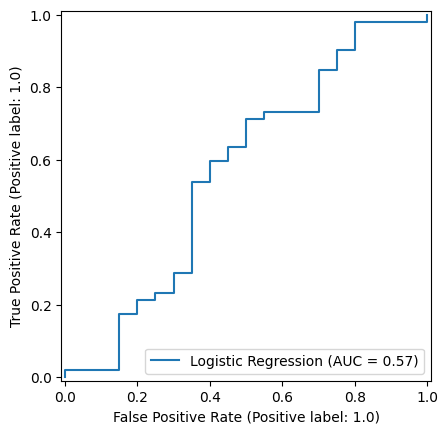

In [ ]:
fig = RocCurveDisplay.from_estimator(linear, test_X, test_y, name = "Logistic Regression")

# Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state = 1)
rf_model.fit(train_X, train_y)

RandomForestClassifier(random_state=1)

In [ ]:
train_pred_rf = rf_model.predict(train_X)
test_pred_rf = rf_model.predict(test_X)
classificationSummary(train_y, train_pred_rf)
classificationSummary(test_y, test_pred_rf)

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0  48   0
     1   0 120
Confusion Matrix (Accuracy 0.6944)

       Prediction
Actual  0  1
     0  2 18
     1  4 48


In [ ]:
confusion_matrix_rf = metrics.confusion_matrix(test_y, test_pred_rf)
print('confusion matrix: \n' , confusion_matrix_rf)

TN = confusion_matrix_rf[0][0]
FN = confusion_matrix_rf[1][0]
TP = confusion_matrix_rf[1][1]
FP = confusion_matrix_rf[0][1]

print(f'Accuracy: {metrics.accuracy_score(test_y, test_pred_rf)}')
print(f'Precision:  {metrics.precision_score(test_y, test_pred_rf)}')
print(f'Recall (Sensitivity):  {metrics.recall_score(test_y, test_pred_rf)}')
print(f'Specificity:  {TN/(TN+FP)}')
print(f'FNR:  {1 - metrics.recall_score(test_y, test_pred_rf)}')
print(f'FPR:  {1 - TN/(TN+FP)}')
print(f'F1 score:  {metrics.f1_score(test_y, test_pred_rf)}')
print(f'AUC: {metrics.roc_auc_score(test_y, rf_model.predict_proba(test_X)[:, 1])}')

confusion matrix: 
 [[ 2 18]
 [ 4 48]]
Accuracy: 0.6944444444444444
Precision:  0.7272727272727273
Recall (Sensitivity):  0.9230769230769231
Specificity:  0.1
FNR:  0.07692307692307687
FPR:  0.9
F1 score:  0.8135593220338984
AUC: 0.5365384615384615


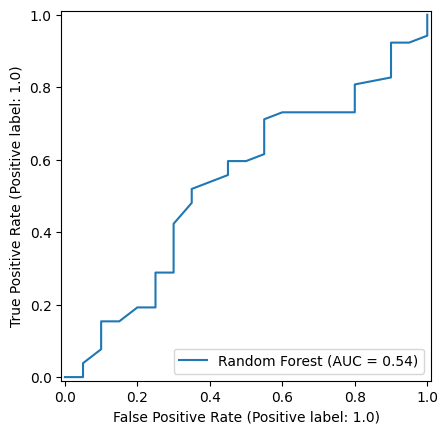

In [ ]:
fig = RocCurveDisplay.from_estimator(rf_model, test_X, test_y, name = "Random Forest")

# Random Forest - GridSearchCV

In [ ]:
param_grid_RF = {
    'max_depth': [5, 10, 15, 20],  # lower v alue for dealing with overfitting
    'min_samples_split': [5, 10, 20], # higher value for dealing with overfitting
    'n_estimators': [100, 200],
    'min_impurity_decrease': [0, 0.0001, 0.001], # # higher value for dealing with overfitting
    'random_state': [1],
}

In [ ]:
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid_RF,cv=5, n_jobs=6)
rf_grid.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_impurity_decrease': [0, 0.0001, 0.001],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [100, 200], 'random_state': [1]})

In [ ]:
rf_grid.best_estimator_
rf_grid.best_params_
train_pred_rf_grid = rf_grid.predict(train_X)
test_pred_rf_grid = rf_grid.predict(test_X)

In [ ]:
classificationSummary(train_y, train_pred_rf_grid)
classificationSummary(test_y, test_pred_rf_grid)

Confusion Matrix (Accuracy 0.9583)

       Prediction
Actual   0   1
     0  41   7
     1   0 120
Confusion Matrix (Accuracy 0.7083)

       Prediction
Actual  0  1
     0  0 20
     1  1 51


In [ ]:
confusion_matrix_rf_grid = metrics.confusion_matrix(test_y, test_pred_rf_grid)
print('confusion matrix: \n' , confusion_matrix_rf_grid)

TN = confusion_matrix_rf_grid[0][0]
FN = confusion_matrix_rf_grid[1][0]
TP = confusion_matrix_rf_grid[1][1]
FP = confusion_matrix_rf_grid[0][1]

print(f'Accuracy: {metrics.accuracy_score(test_y, test_pred_rf_grid)}')
print(f'Precision:  {metrics.precision_score(test_y, test_pred_rf_grid)}')
print(f'Recall (Sensitivity):  {metrics.recall_score(test_y, test_pred_rf_grid)}')
print(f'Specificity:  {TN/(TN+FP)}')
print(f'FNR:  {1 - metrics.recall_score(test_y, test_pred_rf_grid)}')
print(f'FPR:  {1 - TN/(TN+FP)}')
print(f'F1 score:  {metrics.f1_score(test_y, test_pred_rf_grid)}')
print(f'AUC: {metrics.roc_auc_score(test_y, rf_grid.predict_proba(test_X)[:, 1])}')

confusion matrix: 
 [[ 0 20]
 [ 1 51]]
Accuracy: 0.7083333333333334
Precision:  0.7183098591549296
Recall (Sensitivity):  0.9807692307692307
Specificity:  0.0
FNR:  0.019230769230769273
FPR:  1.0
F1 score:  0.8292682926829268
AUC: 0.539423076923077
